In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

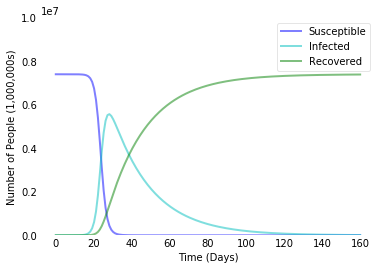

In [2]:
# The total population
N = 7500000000
# The initial number of infected and recovered individuals
I0, R0 = 110000, 0
# Basic Reproduction Rate (R_0)
R = 2.7
# Contact rate (Beta) and recovery rate (Gamma)
gamma = 1/14
beta = (gamma*R)

# Set S0 to our total number of susceptible individuals
S0 = N - I0 - R0
# Create a vector of our initial conditions
y0 = S0, I0, R0

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Time grid in Numpy representing our total time simulated
t = np.linspace(0, 160, 160)
# Integrate the SIR equations over the time grid
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Matplotlib data for graphing the three curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'c', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Number of People (10,000,000,000s)')
ax.set_ylim(0,100000000000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()